In [90]:
%logstop
%logstart -rtq ~/.logs/wqu_2_basic_ds_modules.py append
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

Logging hadn't been started.


C:\Users\User\anaconda3\lib\site-packages\IPython\core\magics\logging.py:130: UserWarning: Couldn't start log: [Errno 2] No such file or directory: 'C:\\Users\\User/.logs/wqu_2_basic_ds_modules.py'
  warn("Couldn't start log: %s" % sys.exc_info()[1])


# Basic data tools: NumPy, Matplotlib, Pandas

Python is a powerful and flexible programming language, but it doesn't have built-in tools for mathematical analysis or data visualization. For most data analysis we will rely on some helpful libraries. We'll explore three libraries that are very common for data analysis and visualization.

## NumPy

First among these is NumPy. The main NumPy features are three-fold: its mathematical functions (e.g. `sin`, `log`, `floor`), its `random` submodule (useful for random sampling), and the NumPy `ndarray` object.

A NumPy array is similar to a mathematical n-dimensional matrix. For example, 

$$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix}$$

A NumPy array could be 1-dimensional (e.g. [1, 5, 20, 34, ...]), 2-dimensional (as above), or many dimensions. It's important to note that all the rows and columns of the 2-dimensional array are the same length. That will be true for all dimensions of arrays.

Let's contrast this with lists.

In [91]:
# to access NumPy, we have to import it
import numpy as np

In [92]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(list_of_lists)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [93]:
an_array = np.array(list_of_lists)
print(an_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [94]:
non_rectangular = [[1, 2], [3, 4, 5], [6, 7, 8, 9]]
print(non_rectangular)

[[1, 2], [3, 4, 5], [6, 7, 8, 9]]


In [95]:
non_rectangular_array = np.array(non_rectangular)
print(non_rectangular_array)

[list([1, 2]) list([3, 4, 5]) list([6, 7, 8, 9])]


Why did these print differently? Let's investigate their _shape_ and _data type_ (`dtype`).

In [96]:
print(an_array.shape, an_array.dtype)
print(non_rectangular_array.shape, non_rectangular_array.dtype)

(3, 3) int32
(3,) object


The first case, `an_array`, is a 2-dimensional 3x3 array (of integers). In contrast, `non_rectangular_array` is a 1-dimensional length 3 array (of _objects_, namely `list` objects).

We can also create a variety of arrays with NumPy's convenience functions.

In [97]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [98]:
np.arange(1, 10, 1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [99]:
np.logspace(1, 10, 10)

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10])

In [100]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [101]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [102]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

We can also convert the `dtype` of an array after creation.

In [103]:
print(np.logspace(1, 10, 10).dtype)
print(np.logspace(1, 10, 10).astype(int).dtype)
np.logspace(1, 10, 10)

float64
int32


array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10])

Wbhy does any of this matter?

Arrays are often more efficient in terms of code as well as computational resources for certain calculations. Computationally this efficiency comes from the fact that we pre-allocate a contiguous block of memory for the results of our computation.

To explore the advantages in code, let's try to do some math on these numbers.

First let's simply calculate the sum of all the numbers and look at the differences in the necessary code for `list_of_lists`, `an_array`, and `non_rectangular_array`.

In [104]:
print(sum([sum(inner_list) for inner_list in list_of_lists]))
print(an_array.sum())

45
45


In [105]:
range(1, 9)
print(range(1, 9)

SyntaxError: unexpected EOF while parsing (<ipython-input-105-b93b3563ad92>, line 2)

Summing the numbers in an array is much easier than for a list of lists. We don't have to dig into a hierarchy of lists, we just use the `sum` method of the `ndarray`. Does this still work for `non_rectangular_array`?

In [106]:
# what happens here?
print(non_rectangular_array.sum())

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Remember `non_rectangular_array` is a 1-dimensional array of `list` objects. The `sum` method tries to add them together: first list + second list + third list. Addition of lists results in _concatenation_.

In [107]:
# concatenate three lists
print([1, 2] + [3, 4, 5] + [6, 7, 8, 9])

[1, 2, 3, 4, 5, 6, 7, 8, 9]


The contrast becomes even more clear when we try to sum rows or columns individually.

In [108]:
print('Array row sums: ', an_array.sum(axis=1))
print('Array column sums: ', an_array.sum(axis=0))

Array row sums:  [ 6 15 24]
Array column sums:  [12 15 18]


In [109]:
print('List of list row sums: ', [sum(inner_list) for inner_list in list_of_lists])

def column_sum(list_of_lists):
    running_sums = [0] * len(list_of_lists[0])
    for inner_list in list_of_lists:
        for i, number in enumerate(inner_list):
            running_sums[i] += number
            
    return running_sums

print('List of list column sums: ', column_sum(list_of_lists))

List of list row sums:  [6, 15, 24]
List of list column sums:  [12, 15, 18]


Generally it is much more natural to do mathematical operations with arrays than lists.

In [110]:
a = np.array([1, 2, 3, 4, 5])
print(a)
print(a + 5) # add a scalar
print(a * 5) # multiply by a scalar
print(a / 5) # divide by a scalar (note the float!)

[1 2 3 4 5]
[ 6  7  8  9 10]
[ 5 10 15 20 25]
[0.2 0.4 0.6 0.8 1. ]


In [111]:
b = a + 1
print(a + b) # add together two arrays
print(a * b) # multiply two arrays (element-wise)
print(a / b.astype(float)) # divide two arrays (element-wise)

[ 3  5  7  9 11]
[ 2  6 12 20 30]
[0.5        0.66666667 0.75       0.8        0.83333333]


Arrays can also be used for linear algebra, acting as vectors, matrices, tensors, etc.

In [112]:
print(np.dot(a, b)) # inner product of two arrays
print(np.outer(a, b)) # outer product of two arrays

70
[[ 2  3  4  5  6]
 [ 4  6  8 10 12]
 [ 6  9 12 15 18]
 [ 8 12 16 20 24]
 [10 15 20 25 30]]


Arrays have a lot to offer us in terms of representing and analyzing data, since we can easily apply mathematical functions to data sets or sections of data sets. Most of the time we won't run into any trouble using arrays, but it's good to be mindful of the restrictions around shape and datatype.

These restrictions around `shape` and `dtype` allow the `ndarray` objects to be much more performant compared to a general Python `list`.  There are few reasons for this, but the main two result from the typed nature of the `ndarray`, as this allows contiguous memory storage and consistent function lookup.  When a Python `list` is summed, Python needs to figure out at runtime the correct way in which to add each element of the list together.  When an `ndarray` is summed, `NumPy` already knows the type of the each element (and they are consistent), thus it can sum them without checking the correct add function for each element.

Lets see this in action by doing some basic profiling.  First we will create a list of 100000 random elements and then time the sum function.

In [113]:
time_list = [np.random.random() for _ in range(100000)]
time_arr = np.array(time_list)

In [114]:
%%timeit 
sum(time_list)

2.42 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [115]:
%%timeit
np.sum(time_arr)

274 µs ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Universal functions

`NumPy` defines a `ufunc` which allows it to efficiently run functions over arrays.  Many of these functions are built in, such as `np.cos`, and implemented in highly performance compiled `C` code.  These functions can perform `broadcasting` which allows them to automatically handle operations between arrays of different shapes, for example two arrays with the same shape, or an array and a scalar.

### Changing Shape

Often we will want to take arrays that are one shape and transform them to a different shape more amenable to a specific operation.

In [116]:
mat = np.random.rand(20, 10)

In [117]:
mat.reshape(40, 5).shape

(40, 5)

In [118]:
%%expect_exception ValueError

mat.reshape(30, 5)

UsageError: Cell magic `%%expect_exception` not found.


In [119]:
mat.ravel().shape

(200,)

In [120]:
mat.transpose().shape

(10, 20)

### Combining arrays

In [121]:
print(a)
print(b)

[1 2 3 4 5]
[2 3 4 5 6]


In [122]:
np.hstack((a, b))

array([1, 2, 3, 4, 5, 2, 3, 4, 5, 6])

In [123]:
np.vstack((a, b))

array([[1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6]])

In [124]:
np.dstack((a, b))

array([[[1, 2],
        [2, 3],
        [3, 4],
        [4, 5],
        [5, 6]]])

### Basic data aggregation

Let's explore some more examples of using arrays, this time using NumPy's `random` submodule to create some "fake data". Simulating data is useful for testing and prototyping new techniques or code, and some algorithms even require random input.

In [125]:
np.random.seed(320)
my_dice = np.random.randint(100, 500, size = (16, 20))
print(my_dice)


[[369 294 366 192 233 369 466 268 135 361 325 399 167 170 372 180 169 247
  470 366]
 [376 405 144 265 380 366 423 423 386 343 199 149 438 224 329 286 482 145
  316 431]
 [289 455 360 279 438 341 245 415 204 334 404 319 414 337 359 232 484 348
  117 210]
 [306 129 174 327 285 309 344 435 202 133 493 403 223 225 438 232 469 403
  303 351]
 [463 336 190 383 403 449 198 256 241 455 469 350 109 258 237 162 108 169
  417 203]
 [275 429 339 152 314 207 340 243 410 454 255 270 116 284 129 332 351 390
  176 296]
 [196 450 279 216 255 311 205 243 304 342 118 371 241 394 212 148 130 319
  323 438]
 [225 452 463 133 109 499 328 339 479 112 453 335 182 418 173 433 230 431
  480 476]
 [298 420 299 353 137 399 266 310 496 292 390 407 360 203 432 443 152 433
  269 382]
 [336 435 105 446 421 342 408 388 277 301 162 357 190 279 280 283 369 113
  421 226]
 [395 288 243 350 347 291 432 412 108 222 153 319 176 447 363 296 346 236
  348 113]
 [276 161 225 297 118 394 472 351 319 438 477 152 348 168 403 481

In [126]:
np.random.seed(42)
jan_coffee_sales = np.random.randint(25, 200, size=(4, 7))
print(jan_coffee_sales)

[[127 117  39 131  96  45 127]
 [146  99 112 141 124 128 176]
 [155 174  77  26 112 182  62]
 [154  45 185  82  46 113  73]]


In [127]:
# mean sales
print('Mean coffees sold per day in January: %d' % jan_coffee_sales.mean())

Mean coffees sold per day in January: 110


In [128]:
# mean sales for Monday
print('Mean coffees sold on Monday in January: %d' % jan_coffee_sales[:, 1].mean())

Mean coffees sold on Monday in January: 108


In [129]:
# mean sales for Tuesday
print('Mean coffees sold on Tuesday in January: %d' % jan_coffee_sales[:, 2].mean())

Mean coffees sold on Tuesday in January: 103


In [130]:
# day with most sales
# remember we count dates from 1, not 0!
print('Day with highest sales was January %d' % (jan_coffee_sales.argmax() + 1))

Day with highest sales was January 24


In [131]:
# is there a weekly periodicity?
from fractions import Fraction

normalized_sales = (jan_coffee_sales - jan_coffee_sales.mean()) / abs(jan_coffee_sales - jan_coffee_sales.mean()).max()
frequencies = [Fraction.from_float(f).limit_denominator() for f in np.fft.fftfreq(normalized_sales.size)]
power = np.abs(np.fft.fft(normalized_sales.ravel()))**2
list(zip(frequencies, power))[:len(power) // 2]

[(Fraction(0, 1), 4.930380657631324e-32),
 (Fraction(1, 28), 11.81850804066758),
 (Fraction(1, 14), 3.062417712828277),
 (Fraction(3, 28), 3.6145035763808595),
 (Fraction(1, 7), 8.992489334676053),
 (Fraction(5, 28), 3.689054592513944),
 (Fraction(3, 14), 8.363267066546033),
 (Fraction(1, 4), 16.615944819859244),
 (Fraction(2, 7), 0.6736105397207648),
 (Fraction(9, 28), 6.846412421396466),
 (Fraction(5, 14), 14.279717692527932),
 (Fraction(11, 28), 17.951272090034657),
 (Fraction(3, 7), 4.608890497088778),
 (Fraction(13, 28), 6.579601542582696)]

Some of the functions we used above do not exist in standard Python and are provided to us by NumPy. Additionally we see that we can use the shape of an array to help us compute statistics on a subset of our data (e.g. mean number of coffees sold on Mondays). But one of the most powerful things we can do to explore data is to simply visualize it.

## Matplotlib

Matplotlib is the most popular Python plotting library. It allows us to visualize data quickly by providing a variety of types of graphs (e.g. bar, scatter, line, etc.). It also provides useful tools for arranging multiple images or image components within a figure, enabling us to build up more complex visualizations as we need to.

Let's visualize some data! In the next cells, we'll generate some data. For now we'll be focusing on how the graphs are produced rather than how the data is made.

In [132]:
import matplotlib.pyplot as plt

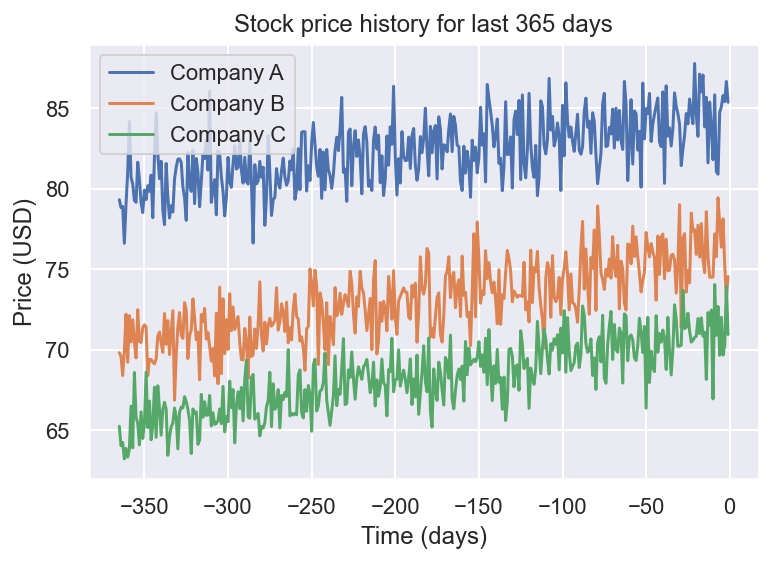

In [133]:
def gen_stock_price(days, initial_price):
    # stock price grows or shrinks linearly
    # not exceeding 10% per year (heuristic)
    trend = initial_price * (np.arange(days) * .1 / 365 * np.random.rand() * np.random.choice([1, -1]) + 1)
    # noise will be about 2%
    noise = .02 * np.random.randn(len(trend)) * trend
    return trend + noise

days = 365
initial_prices = [80, 70, 65]
for price in initial_prices:
    plt.plot(np.arange(-days, 0), gen_stock_price(days, price))
plt.title('Stock price history for last %d days' % days)
plt.xlabel('Time (days)')
plt.ylabel('Price (USD)')
plt.legend(['Company A', 'Company B', 'Company C'])

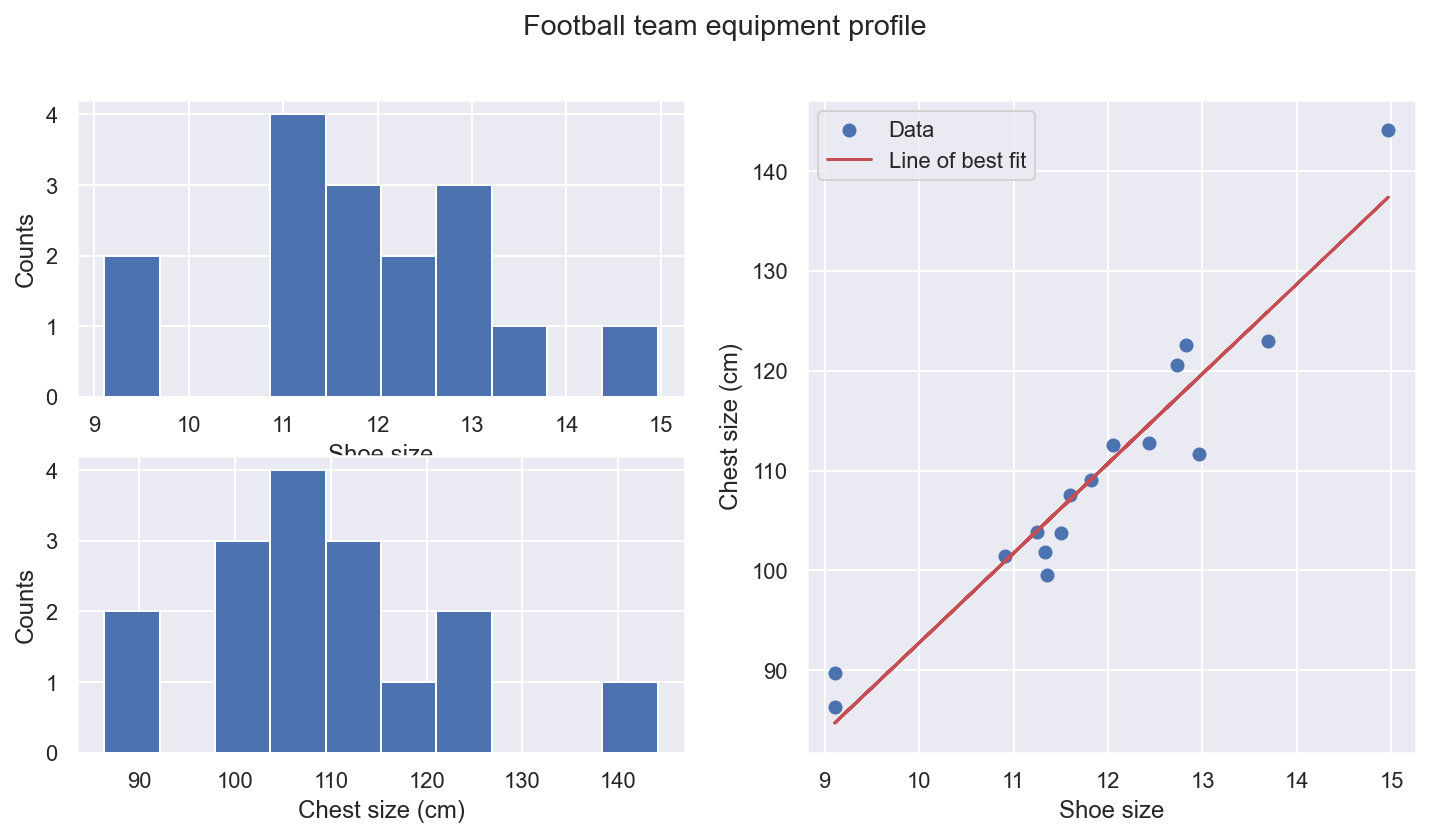

In [134]:
from scipy.stats import linregress

def gen_football_team(n_players, mean_shoe, mean_jersey):
    shoe_sizes = np.random.normal(size=n_players, loc=mean_shoe, scale=.15 * mean_shoe)
    jersey_sizes = mean_jersey / mean_shoe * shoe_sizes + np.random.normal(size=n_players, scale=.05 * mean_jersey)

    return shoe_sizes, jersey_sizes

shoes, jerseys = gen_football_team(16, 11, 100)

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Football team equipment profile')

ax1 = plt.subplot(221)
ax1.hist(shoes)
ax1.set_xlabel('Shoe size')
ax1.set_ylabel('Counts')

ax2 = plt.subplot(223)
ax2.hist(jerseys)
ax2.set_xlabel('Chest size (cm)')
ax2.set_ylabel('Counts')

ax3 = plt.subplot(122)
ax3.scatter(shoes, jerseys, label='Data')
ax3.set_xlabel('Shoe size')
ax3.set_ylabel('Chest size (cm)')

fit_line = linregress(shoes, jerseys)
ax3.plot(shoes, fit_line[1] + fit_line[0] * shoes, 'r', label='Line of best fit')

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1])

Text(0, 0.5, 'Temperature (C)')

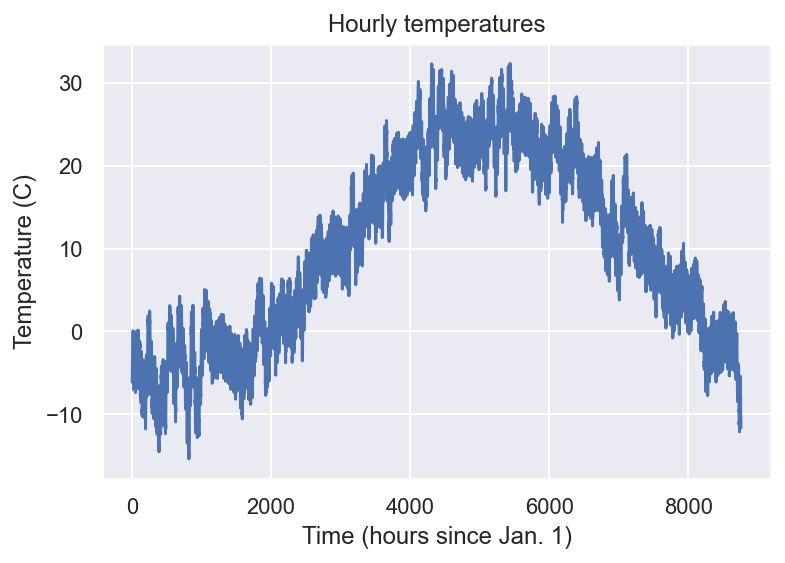

In [135]:
def gen_hourly_temps(days):
    ndays = len(days)
    seasonality = (-15 * np.cos((np.array(days) - 30) * 2.0 * np.pi / 365)).repeat(24) + 10
    solar = -3 * np.cos(np.arange(24 * ndays) * 2.0 * np.pi / 24)
    weather = np.interp(range(len(days) * 24), range(0, 24 * len(days), 24 * 2), 3 * np.random.randn(np.ceil(float(len(days)) / 2).astype(int)))
    noise = .5 * np.random.randn(24 * len(days))

    return seasonality + solar + weather + noise

days = np.arange(365)
hours = np.arange(days[0] * 24, (days[-1] + 1) * 24)
plt.plot(hours, gen_hourly_temps(days))
plt.title('Hourly temperatures')
plt.xlabel('Time (hours since Jan. 1)')
plt.ylabel('Temperature (C)')

In the examples above we've made use of the ubiquitous plot command, subplot for arranging multiple plots in one image, and hist for creating histograms. We've also used both the "state machine" (i.e. using a sequence of plt.method commands) and "object-oriented" (i.e. creating figure objects and mutating them) plotting paradigms. The Matplotlib package is very flexible and the possibilities for visualizing data are mostly limited by imagination. A great way to explore Matplotlib and other data visualization packages is by consulting their gallery pages.



# Pandas

NumPy is useful for handling data as it lets us efficiently apply functions to whole data sets or select pieces of them. However, it can be difficult to keep track of related data that might be stored in different arrays, or the meaning of data stored in different rows or columns of the same array.

For example, in the previous section we had a 1-dimensional array for shoe sizes, and another 1-dimensional array for jersey sizes. If we wanted to look up the shoe and jersey size for a particular player, we'd have to remember his position in each array.

Alternatively, we could combine the two 1-dimensional arrays to make a 2-dimensional array with `n_players` rows and two columns (one for shoe size, one for jersey size). But once we combine the data, we now have to remember which column is shoe size and which column is jersey size.

The Pandas package introduces a very powerful tool for working with data in Python: the DataFrame. A DataFrame is a table. Each column represents a different type of data (sometimes called a **field**). The columns are named, so I could have a column called `'shoe_size'` and a column called `'jersey_size'`. I don't have to remember which column is which, because I can refer to them by name. Each row represents a different **record** or **entity** (e.g. player). I can also name the rows, so instead of remembering which row in my array corresponds with Ronaldinho, I can name the row 'Ronaldinho' and look up his shoe size and jersey size by name.m

In [137]:


players = ['Ronaldinho', 'Pele', 'Messi', 'Zidane', 'Drogba', 'Ronaldo', 'Y.Toure', 'Puyol',
           'Rijkaard', 'Maradona', 'Aboutrika', "Eto'o",'George.B', 'George.W', 'Roberto.C']
print(players)
shoes, jerseys = gen_football_team(len(players), 15, 100)

df_jersey = pd.DataFrame({'shoe_size': shoes, 'jersey_size': jerseys}, index = players)

df_jersey

['Ronaldinho', 'Pele', 'Messi', 'Zidane', 'Drogba', 'Ronaldo', 'Y.Toure', 'Puyol', 'Rijkaard', 'Maradona', 'Aboutrika', "Eto'o", 'George.B', 'George.W', 'Roberto.C']


,shoe_size,jersey_size
Ronaldinho,14.367292,90.033239
Pele,15.277693,103.473016
Messi,16.000332,101.487234
Zidane,15.976129,102.230115
Drogba,13.305486,87.335102
Ronaldo,12.473442,77.894632
Y.Toure,20.632137,135.169905
Puyol,13.911035,86.773356
Rijkaard,16.573228,101.322334
Maradona,11.382807,80.975166


In [138]:
players = ['Ronaldinho', 'Pele', 'Messi', 'Zidane', 'Drogba', 'Ronaldo', 'Y.Toure', 'Puyol',
           'Rijkaard', 'Maradona', 'Aboutrika', "Eto'o",'George.B', 'George.W', 'Roberto.C']
players

['Ronaldinho',
 'Pele',
 'Messi',
 'Zidane',
 'Drogba',
 'Ronaldo',
 'Y.Toure',
 'Puyol',
 'Rijkaard',
 'Maradona',
 'Aboutrika',
 "Eto'o",
 'George.B',
 'George.W',
 'Roberto.C']

In [139]:
# or we can also make a dataframe using zip

df_jersey = pd.DataFrame(list(zip(shoes, jerseys)), columns = ['shoe_size', 'jersey_size'], index = players)

df_jersey

,shoe_size,jersey_size
Ronaldinho,14.367292,90.033239
Pele,15.277693,103.473016
Messi,16.000332,101.487234
Zidane,15.976129,102.230115
Drogba,13.305486,87.335102
Ronaldo,12.473442,77.894632
Y.Toure,20.632137,135.169905
Puyol,13.911035,86.773356
Rijkaard,16.573228,101.322334
Maradona,11.382807,80.975166


In [140]:
print(df_jersey['jersey_size'])

Ronaldinho     90.033239
Pele          103.473016
Messi         101.487234
Zidane        102.230115
Drogba         87.335102
Ronaldo        77.894632
Y.Toure       135.169905
Puyol          86.773356
Rijkaard      101.322334
Maradona       80.975166
Aboutrika      89.325566
Eto'o          97.198605
George.B      110.856681
George.W       56.088467
Roberto.C      98.366280
Name: jersey_size, dtype: float64


The DataFrame has similarities to both a `dict` and a NumPy `ndarray`. For example, we can retrieve a column from the DataFrame by using its name, just like we would retrieve an item from a `dict` using its key.

In [141]:
print(df_jersey['shoe_size'])

Ronaldinho    14.367292
Pele          15.277693
Messi         16.000332
Zidane        15.976129
Drogba        13.305486
Ronaldo       12.473442
Y.Toure       20.632137
Puyol         13.911035
Rijkaard      16.573228
Maradona      11.382807
Aboutrika     14.370871
Eto'o         14.713801
George.B      16.063834
George.W       8.874478
Roberto.C     15.373816
Name: shoe_size, dtype: float64


And we can easily apply functions to the DataFrame, just like we would with a NumPy array.

In [142]:
print(np.log(df_jersey))

            shoe_size  jersey_size
Ronaldinho   2.664954     4.500179
Pele         2.726394     4.639311
Messi        2.772609     4.619933
Zidane       2.771096     4.627226
Drogba       2.588176     4.469752
Ronaldo      2.523602     4.355357
Y.Toure      3.026850     4.906533
Puyol        2.632682     4.463300
Rijkaard     2.807789     4.618307
Maradona     2.432104     4.394143
Aboutrika    2.665203     4.492288
Eto'o        2.688786     4.576756
George.B     2.776570     4.708238
George.W     2.183180     4.026930
Roberto.C    2.732666     4.588698


In [143]:
#this return the mean of each column or field

df_jersey.mean()

shoe_size      14.619759
jersey_size    94.568647
dtype: float64

In [144]:
df_jersey.std()

shoe_size       2.635665
jersey_size    17.466797
dtype: float64

We'll explore applying functions and analyzing data in a DataFrame in more depth later on. 
First we need to know how to retrieve, add, and remove data from a DataFrame.

We've already seen how to retrieve a column, what about retrieving a row? The most flexible syntax is to use the DataFrame's `loc` method.

In [145]:
print(df_jersey.loc['Ronaldo'])

shoe_size      12.473442
jersey_size    77.894632
Name: Ronaldo, dtype: float64


In [146]:
print(df_jersey.loc['Puyol'])

shoe_size      13.911035
jersey_size    86.773356
Name: Puyol, dtype: float64


In [159]:
#you can select two players to work on;

print(df_jersey.loc[['Ronaldo', 'George.B'], 'shoe_size'])

Ronaldo     12.473442
George.B    16.063834
Name: shoe_size, dtype: float64


In [161]:
# can also select position-based slices of data
print(df_jersey.loc['Ronaldo':'George.B', 'shoe_size'])

Ronaldo      12.473442
Y.Toure      20.632137
Puyol        13.911035
Rijkaard     16.573228
Maradona     11.382807
Aboutrika    14.370871
Eto'o        14.713801
George.B     16.063834
Name: shoe_size, dtype: float64


In [164]:
# for position-based indexing, we will typically use iloc
print(df_jersey.iloc[:5])

            shoe_size  jersey_size
Ronaldinho  14.367292    90.033239
Pele        15.277693   103.473016
Messi       16.000332   101.487234
Zidane      15.976129   102.230115
Drogba      13.305486    87.335102


In [166]:
print(df_jersey.iloc[2:4, 0])

Messi     16.000332
Zidane    15.976129
Name: shoe_size, dtype: float64


In [167]:
# to see just the top of the DataFrame, use head
df_jersey.head()

,shoe_size,jersey_size
Ronaldinho,14.367292,90.033239
Pele,15.277693,103.473016
Messi,16.000332,101.487234
Zidane,15.976129,102.230115
Drogba,13.305486,87.335102


In [168]:
df_jersey.tail()

,shoe_size,jersey_size
Aboutrika,14.370871,89.325566
Eto'o,14.713801,97.198605
George.B,16.063834,110.856681
George.W,8.874478,56.088467
Roberto.C,15.373816,98.366280


Just as with a `dict`, we can add data to our DataFrame by simply using the same syntax as we would use to retrieve data, but matching it with an assignment.

In [173]:
# adding a new column
df_jersey['position'] = np.random.choice(['defense', 'mildfielder', 'attacker'], size = len(df_jersey))
df_jersey.head()

,shoe_size,jersey_size,position
Ronaldinho,14.367292,90.033239,attacker
Pele,15.277693,103.473016,attacker
Messi,16.000332,101.487234,defense
Zidane,15.976129,102.230115,defense
Drogba,13.305486,87.335102,attacker


In [178]:
# adding a new row
df_jersey.loc['Dylan'] = {'jersey_size': 91, 'shoe_size': 9, 'position': 'midfielder'}
df_jersey.loc['Dylan']
df_jersey.tail()

,shoe_size,jersey_size,position
Eto'o,14.7138,97.1986,attacker
George.B,16.0638,110.857,defense
George.W,8.87448,56.0885,defense
Roberto.C,15.3738,98.3663,defense
Dylan,9,91,midfielder


In [176]:
df_jersey.drop('Dylan')

,shoe_size,jersey_size,position
Ronaldinho,14.367292,90.033239,attacker
Pele,15.277693,103.473016,attacker
Messi,16.000332,101.487234,defense
Zidane,15.976129,102.230115,defense
Drogba,13.305486,87.335102,attacker
Ronaldo,12.473442,77.894632,defense
Y.Toure,20.632137,135.169905,attacker
Puyol,13.911035,86.773356,attacker
Rijkaard,16.573228,101.322334,attacker
Maradona,11.382807,80.975166,attacker


In [182]:
#to drop column
df_jersey.drop('position', axis=1)

,shoe_size,jersey_size
Ronaldinho,14.3673,90.0332
Pele,15.2777,103.473
Messi,16.0003,101.487
Zidane,15.9761,102.23
Drogba,13.3055,87.3351
Ronaldo,12.4734,77.8946
Y.Toure,20.6321,135.17
Puyol,13.911,86.7734
Rijkaard,16.5732,101.322
Maradona,11.3828,80.9752


In [181]:
df_jersey

,shoe_size,jersey_size,position
Ronaldinho,14.3673,90.0332,attacker
Pele,15.2777,103.473,attacker
Messi,16.0003,101.487,defense
Zidane,15.9761,102.23,defense
Drogba,13.3055,87.3351,attacker
Ronaldo,12.4734,77.8946,defense
Y.Toure,20.6321,135.17,attacker
Puyol,13.911,86.7734,attacker
Rijkaard,16.5732,101.322,attacker
Maradona,11.3828,80.9752,attacker


Notice when we executed `df.drop('position', axis=1)`, there was an entry for `Dylan` even though we had just executed `df.drop('Dylan')`. We have to be careful when using `drop`; many DataFrame functions return a _copy_ of the DataFrame. In order to make the change permanent, we either need to reassign `df` to the copy returned by `df.drop()` or we have to use the keyword `inplace`.

In [183]:
df_jersey = df_jersey.drop('Dylan')
print(df_jersey)

           shoe_size jersey_size     position
Ronaldinho   14.3673     90.0332     attacker
Pele         15.2777     103.473     attacker
Messi        16.0003     101.487      defense
Zidane       15.9761      102.23      defense
Drogba       13.3055     87.3351     attacker
Ronaldo      12.4734     77.8946      defense
Y.Toure      20.6321      135.17     attacker
Puyol         13.911     86.7734     attacker
Rijkaard     16.5732     101.322     attacker
Maradona     11.3828     80.9752     attacker
Aboutrika    14.3709     89.3256  mildfielder
Eto'o        14.7138     97.1986     attacker
George.B     16.0638     110.857      defense
George.W     8.87448     56.0885      defense
Roberto.C    15.3738     98.3663      defense


In [184]:
df_jersey.drop('position', axis=1, inplace=True)
print(df_jersey)

           shoe_size jersey_size
Ronaldinho   14.3673     90.0332
Pele         15.2777     103.473
Messi        16.0003     101.487
Zidane       15.9761      102.23
Drogba       13.3055     87.3351
Ronaldo      12.4734     77.8946
Y.Toure      20.6321      135.17
Puyol         13.911     86.7734
Rijkaard     16.5732     101.322
Maradona     11.3828     80.9752
Aboutrika    14.3709     89.3256
Eto'o        14.7138     97.1986
George.B     16.0638     110.857
George.W     8.87448     56.0885
Roberto.C    15.3738     98.3663


In [195]:
#you can use the code below to:
df_jersey{{}} df_jersey.drop(['shoe_size'], axis=1)


AttributeError: 'list' object has no attribute 'drop'

*Copyright &copy; 2020 The Data Incubator.  All rights reserved.*
**Edited by Chisomloius**